### Let's see what this looks like 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from src.data_funcs import BikeData
from src.plot_funcs import chart

In [4]:
bike = BikeData('bike_data.pickle') #comment

In [13]:
rentals_per_month = bike.rentals_per_month()
revenue_per_month = bike.revenue_per_month()

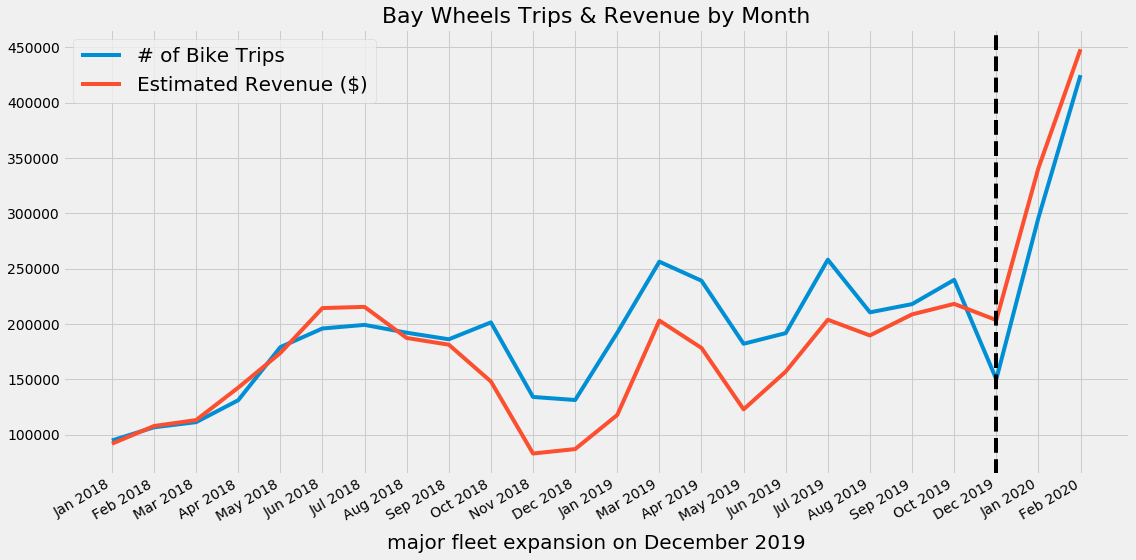

In [14]:
chart([rentals_per_month, revenue_per_month], kind='plot', name='Bay Wheels Trips & Revenue by Month', x_name='major fleet expansion on December 2019',
      legend=('# of Bike Trips', 'Estimated Revenue ($)'), line=['Dec 2019'])
#plt.savefig('Growth.png')

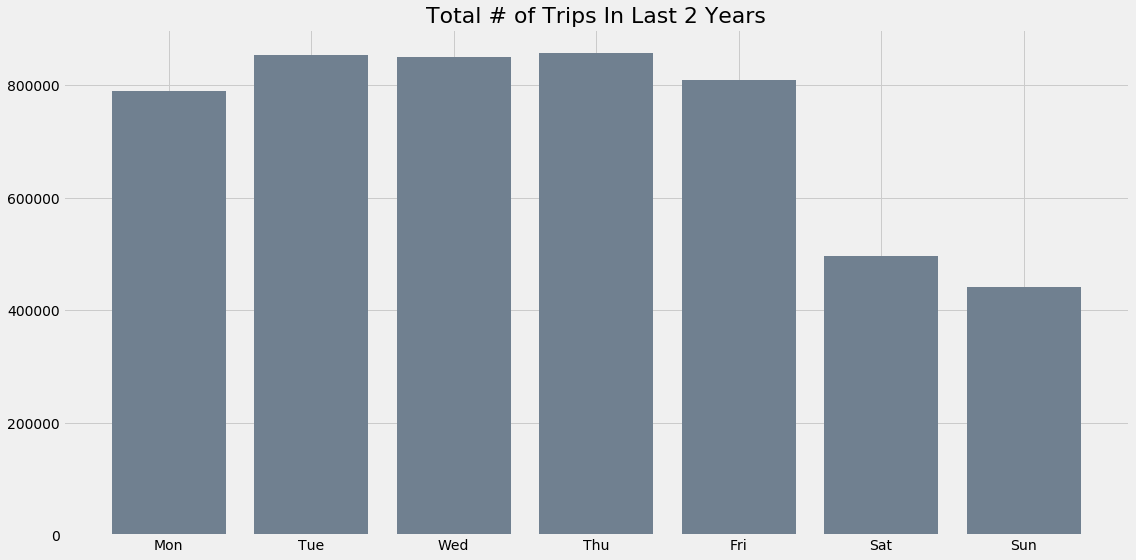

In [13]:
daily_popularity = bike.weekly_popularity()
chart([daily_popularity], kind='bar', name='Total # of Trips In Last 2 Years', fmt=False)
#plt.savefig('TripsperDay.png')

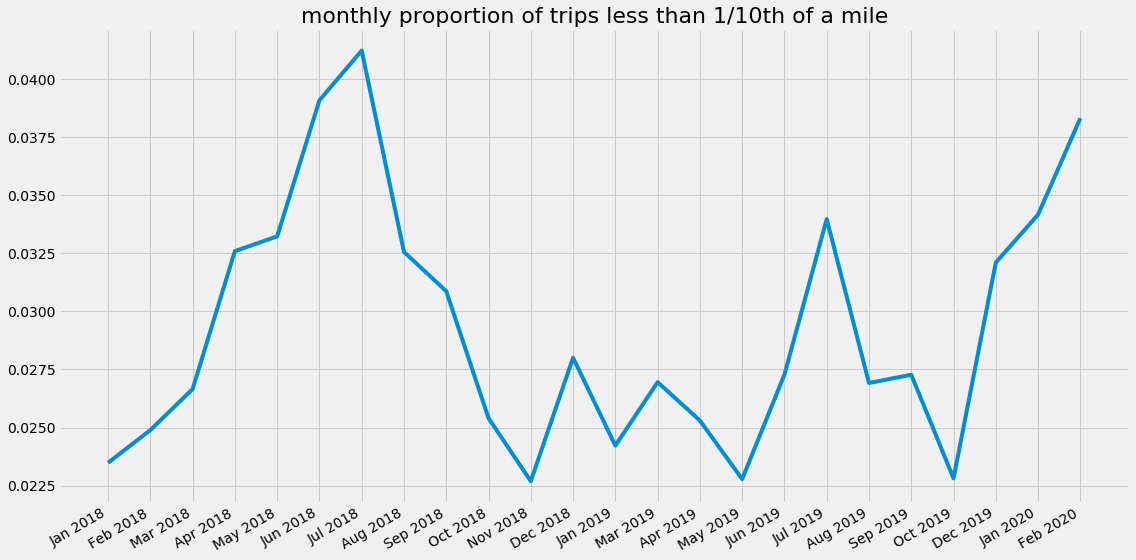

In [7]:
short_trips = bike.monthly_short_trips()
chart([short_trips], kind='plot', name='monthly proportion of trips less than 1/10th of a mile')
#plt.savefig('ShortTripsProportion.png')

In [76]:
duration = bike.df[bike.df.duration_sec < 60*30]
sample = duration.sample(10**5, replace=False)

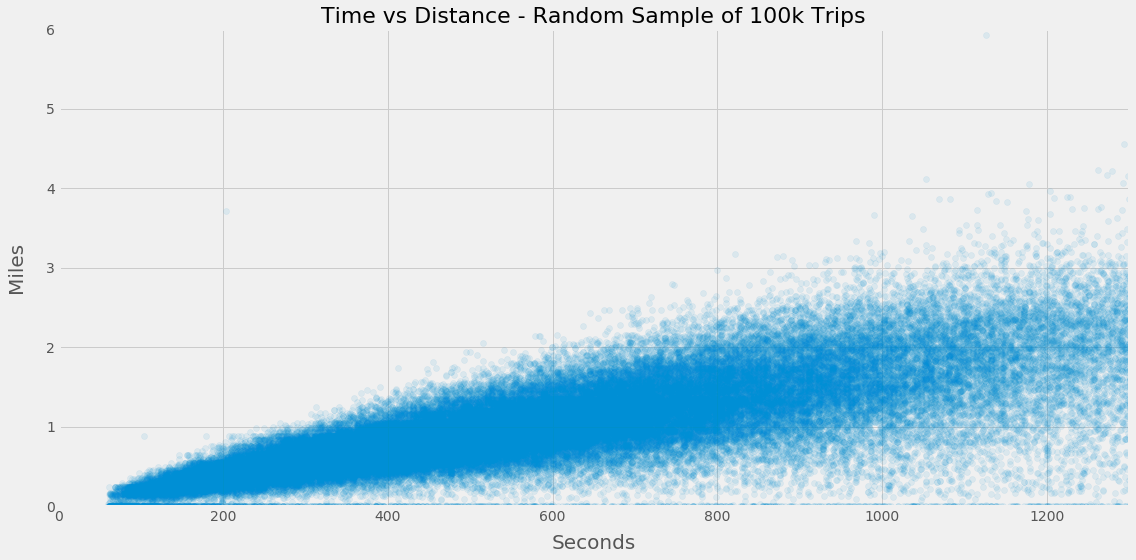

In [130]:
chart([sample.duration_sec, sample.distance], kind='scatter', name='Time vs Distance - Random Sample of 100k Trips', x_name='Seconds', y_name='Miles', fmt=False)
#plt.savefig('TimevDistance.png')

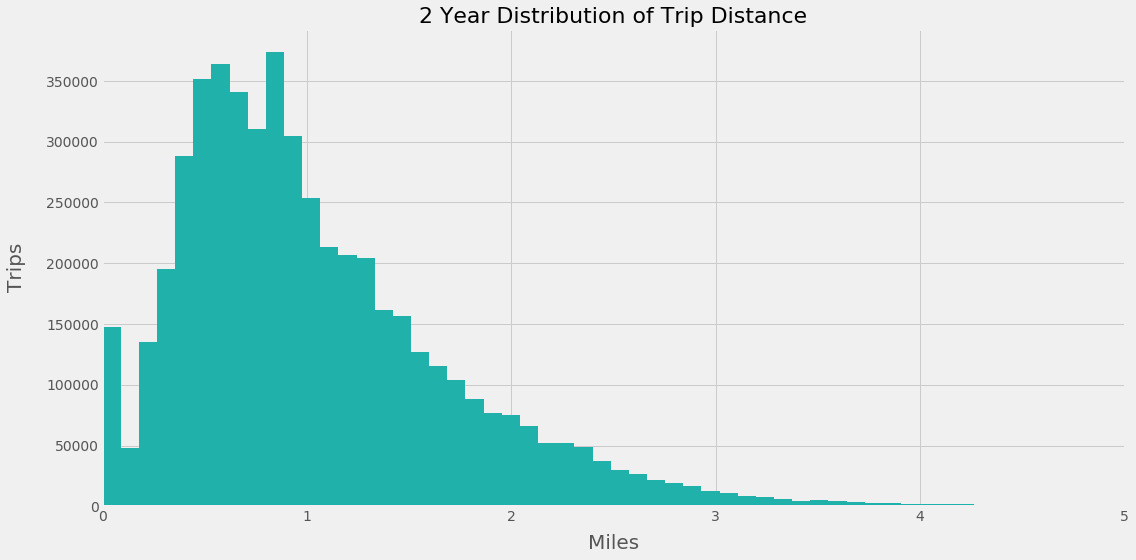

In [120]:
chart([bike.df.distance], kind='hist', name='2 Year Distribution of Trip Distance', x_name='Miles', y_name='Trips', b=[10**3, 0, 5], fmt=False)
#plt.savefig('TripDistanceDistribution.png')

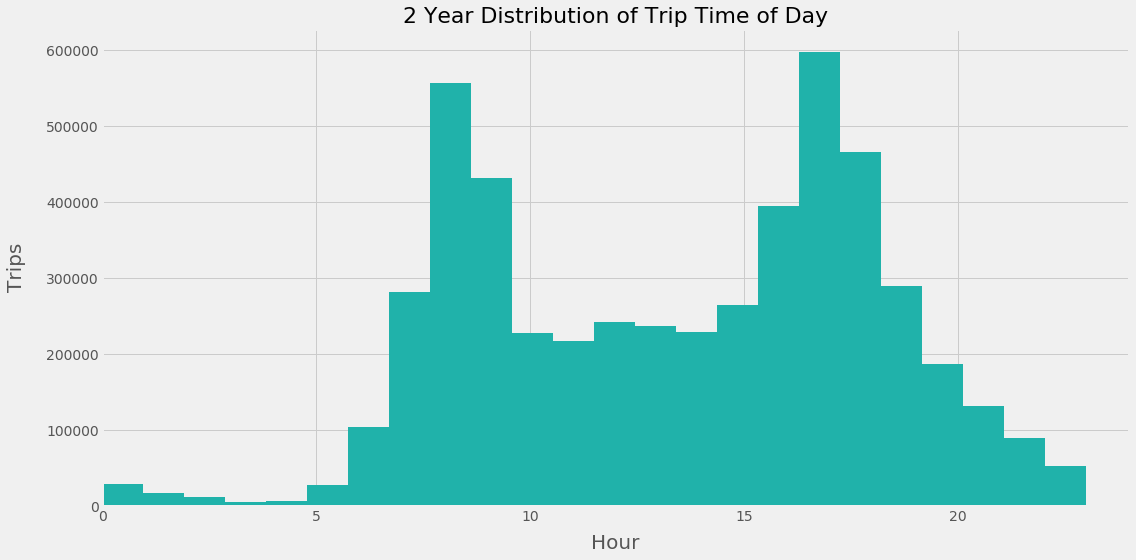

In [118]:
chart([bike.df.hour], kind='hist', name='2 Year Distribution of Trip Time of Day', x_name='Hour', y_name='Trips', b=[24,0,24], fmt=False)
#plt.savefig('TripTimeDistribution.png')

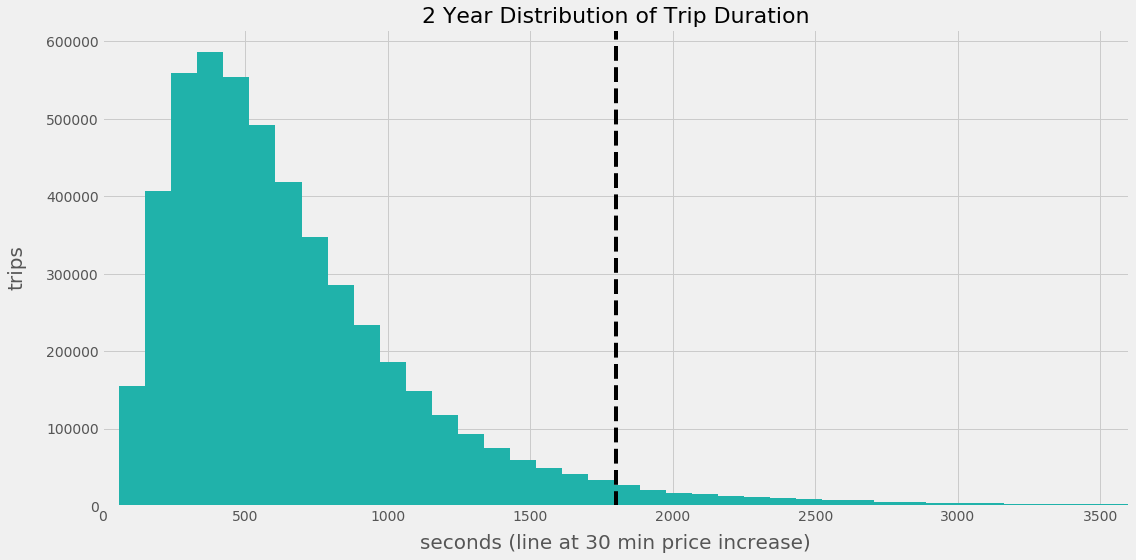

In [121]:
time = bike.df.duration_sec
chart([time], kind='hist', name='2 Year Distribution of Trip Duration', x_name='seconds (line at 30 min price increase)', y_name='trips', b=[10**4, 0, 60*60], line=[60*30], fmt=False)
#plt.savefig('TripDurationDistribution.png')

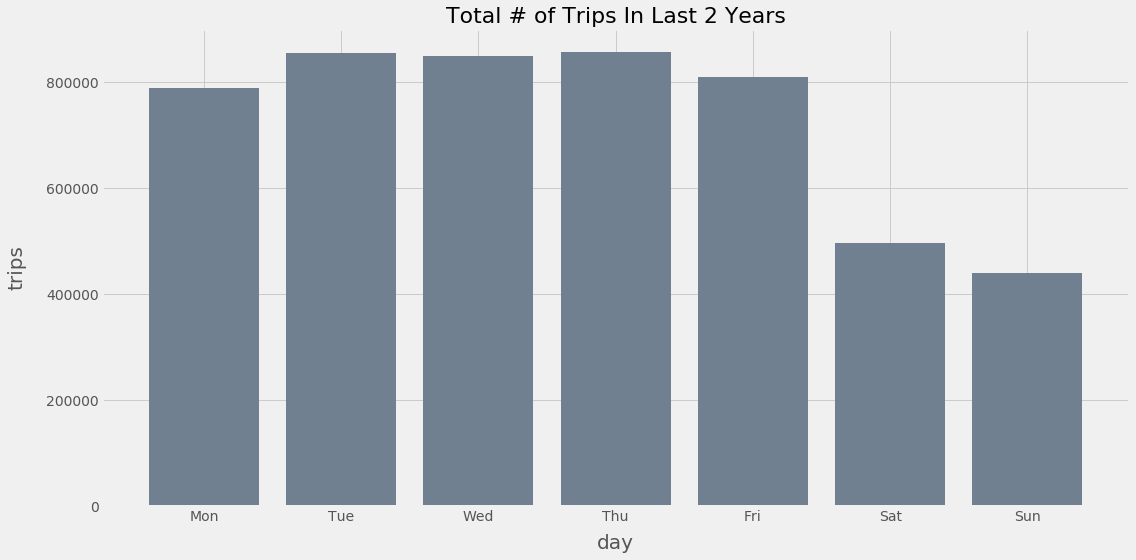

In [112]:
revenue = bike.df.revenue
chart([revenue], kind='hist', x_name='Dollars', y_name='trips', b=[10**3, 0, 20], fmt=False)
plt.savefig('RevenueDistribution.png')

#### Surprised to see that without fail, weekend trips are taken a less than proportionately normal amount!


In [12]:
bike.df[bike.df.user_type == 'Customer'].groupby('weekend').duration_sec.mean() / 60

weekend
False    20.453019
True     29.682869
Name: duration_sec, dtype: float64

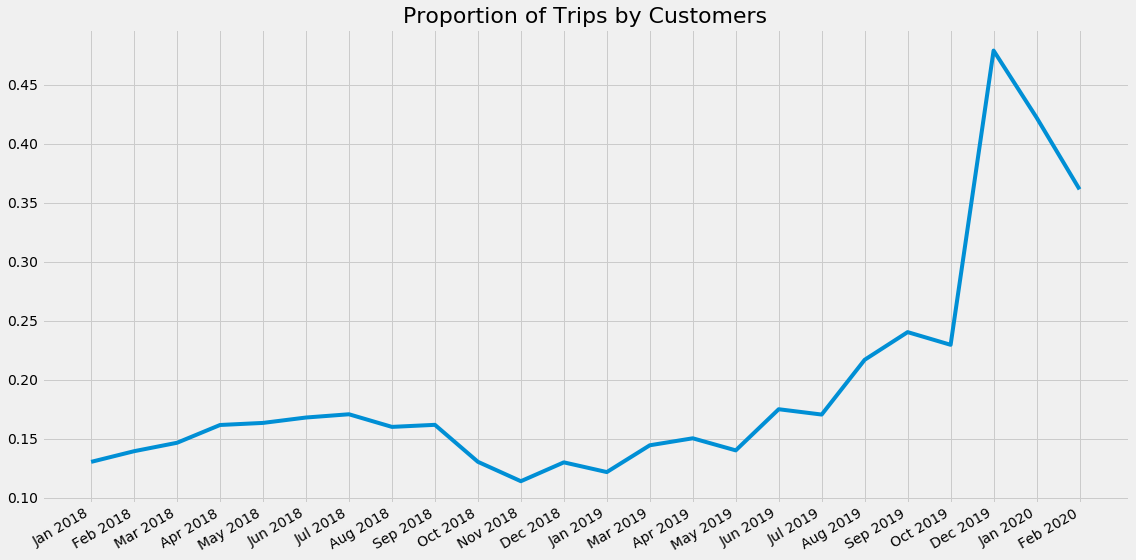

In [10]:
monthly_customers = bike.proportion_of_customers()
chart([monthly_customers], kind='plot', name="Proportion of Trips by Customers")
#plt.savefig('CustomerProportion.png')

In [5]:
wkday_dist, wkend_dist = bike.weekday_v_weekend_distances()
wkday_dur, wkend_dur = bike.weekday_v_weekend_times()
wkday_prof, wkend_prof = bike.weekday_v_weekend_profits()
wkday_cust, wkend_cust = bike.weekday_v_weekend_customers()

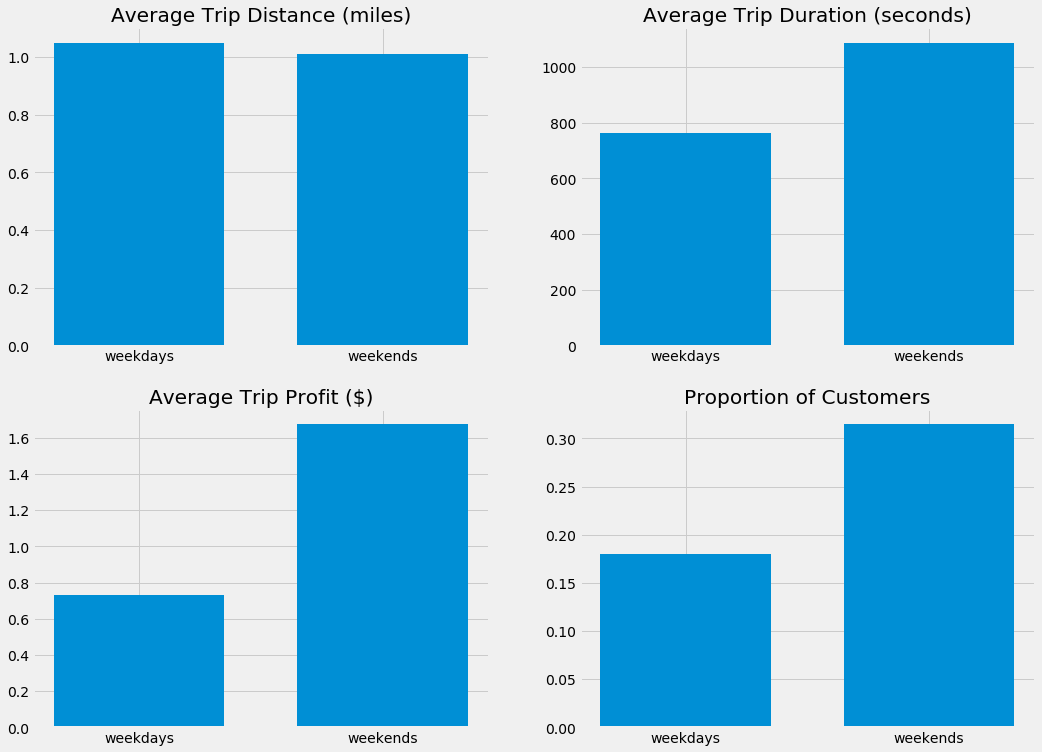

In [10]:
graph_list = [[wkday_dist, wkend_dist], [wkday_dur, wkend_dur], 
              [wkday_prof, wkend_prof], [wkday_cust, wkend_cust]]
graph_names = ['Average Trip Distance (miles)', 'Average Trip Duration (minutes)', 
                'Average Trip Profit ($)', 'Proportion of Customers']
fig, axs = plt.subplots(2, 2, figsize=(16,12))
xt = ['weekdays', 'weekends']
for i, ax in enumerate(axs.flatten()):
    ax.bar(xt, graph_list[i], width=.7)
    ax.set_xticks(xt)
    ax.set_title(graph_names[i])

#plt.savefig('Week_v_end.png')

### PROBABILITY OF A CASUAL BIKE RENT BEING A BIG TICKET CUSTOMER

In [16]:
bool_mask = (bike.df.month == 'Dec') & (bike.df.year == '2019')
idx = bool_mask.to_numpy().nonzero()[0][0]

In [20]:
before_grp = bike.df.iloc[:idx]
after_grp = bike.df.iloc[idx:]#[bike.df.user_type == 'Customer']
before_grp[before_grp.user_type == 'Customer']

,year,month,date,hour,day_of_week,weekend,bike_id,user_type,revenue,duration_sec,distance,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
1,2018,Jan,31,16,Wed,False,2815,Customer,281,85422,0.000000,37.795392,-122.394203,37.795392,-122.394203
2,2018,Jan,31,14,Wed,False,3039,Customer,236,71576,1.846937,37.348759,-121.894798,37.325998,-121.877120
3,2018,Jan,31,14,Wed,False,321,Customer,200,61076,1.275856,37.773793,-122.421239,37.780955,-122.399749
5,2018,Jan,31,22,Wed,False,1306,Customer,20,6477,0.684546,37.803686,-122.282497,37.805318,-122.294837
10,2018,Jan,31,23,Wed,False,1278,Customer,2,1316,1.601926,37.765052,-122.421866,37.785881,-122.408915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185241,2019,Nov,22,9,Fri,False,399513,Customer,32,10396,0.007594,37.766036,-122.395929,37.765950,-122.395843
185309,2019,Nov,05,14,Tue,False,283550,Customer,11,4390,0.001138,37.774606,-122.413977,37.774591,-122.413985
185455,2019,Nov,22,12,Fri,False,865850,Customer,2,690,0.760083,37.776680,-122.392241,37.766011,-122.395721
185460,2019,Nov,23,12,Sat,True,338364,Customer,5,2403,0.000000,37.781452,-122.454352,0.000000,0.000000


In [5]:
big_money = bike.big_money_probability()

In [15]:
before_normal = stats.norm(big_money[0][0], big_money[0][1])
after_normal = stats.norm(big_money[1][0], big_money[1][1])

In [16]:
big_money

[[0.1627136713656959, 0.36910422988146885],
 [0.06587078372098976, 0.2480560895704283]]

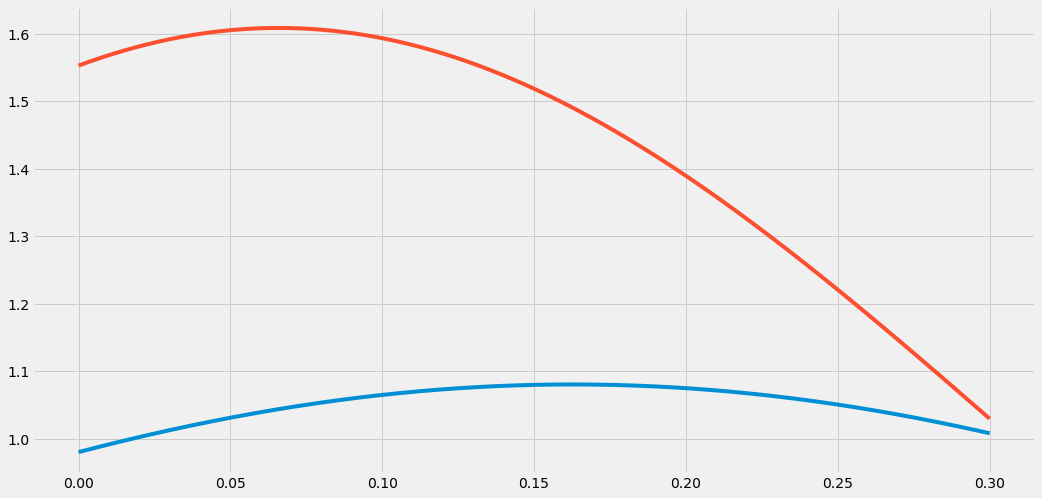

In [17]:
fig, ax = plt.subplots(figsize=(16,8))
x = np.linspace(0, .3, num = 10**5)
ax.plot(x, before_normal.pdf(x))
ax.plot(x, after_normal.pdf(x))